Tree Species Classification

Step 1: Mount Your Google Drive

In [18]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


 Step 2: Set Dataset Path


In [19]:
import os

dataset_path = '/content/drive/MyDrive/Tree species classification'


Step 3: Unzip the Dataset

In [20]:
import zipfile

# Path to your ZIP file in Drive
zip_path = '/content/drive/MyDrive/Tree species dataset.zip'

# Destination to unzip
extract_path = '/content/tree_species_dataset'

# Unzip
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("✅ Unzipping completed!")


✅ Unzipping completed!


 Step 3: Count Folders (Species) and Total Images


In [21]:
import os

def count_folders_and_images(path):
    total_images = 0
    folder_set = set()

    for root, dirs, files in os.walk(path):
        for folder in dirs:
            folder_set.add(os.path.join(root, folder))
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                total_images += 1

    print(f"📁 Total Folders (Species): {len(folder_set)}")
    print(f"🖼️ Total Images: {total_images}")

dataset_path = '/content/tree_species_dataset'
count_folders_and_images(dataset_path)


📁 Total Folders (Species): 34
🖼️ Total Images: 1600


Step 4: Check for Duplicate and Unique Images

In [22]:
import hashlib
from PIL import Image

def find_duplicates(path):
    hash_set = set()
    duplicates = []
    unique_images = 0

    for subdir, _, files in os.walk(path):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                file_path = os.path.join(subdir, file)
                try:
                    with Image.open(file_path) as img:
                        img_hash = hashlib.md5(img.tobytes()).hexdigest()
                        if img_hash in hash_set:
                            duplicates.append(file_path)
                        else:
                            hash_set.add(img_hash)
                            unique_images += 1
                except Exception as e:
                    print(f"❌ Error reading: {file_path} - {e}")

    print(f"✅ Unique Images: {unique_images}")
    print(f"⚠️ Duplicate Images: {len(duplicates)}")

    return duplicates

duplicate_files = find_duplicates(dataset_path)


✅ Unique Images: 1514
⚠️ Duplicate Images: 86


Step 5: Preview Duplicate Images

In [23]:
print("📌 Sample duplicate images:")
for dup in duplicate_files[:5]:
    print(dup)


📌 Sample duplicate images:
/content/tree_species_dataset/Tree_Species_Dataset/coconut/download (1).jpg
/content/tree_species_dataset/Tree_Species_Dataset/sonmahor/download (6).jpeg
/content/tree_species_dataset/Tree_Species_Dataset/kesudo/images (33).jpeg
/content/tree_species_dataset/Tree_Species_Dataset/kesudo/images (6).jpeg
/content/tree_species_dataset/Tree_Species_Dataset/kesudo/download.jpeg


Step 6: Detect and Show Duplicate Images (Visually)

⚠️ Total duplicate images found: 86


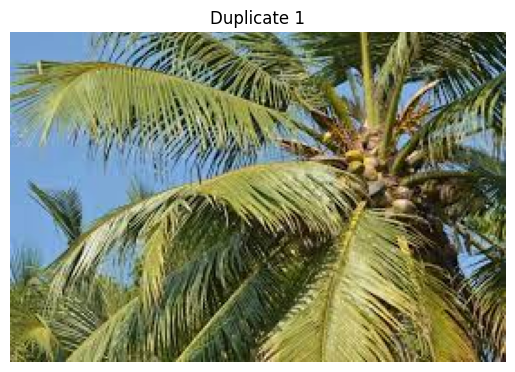

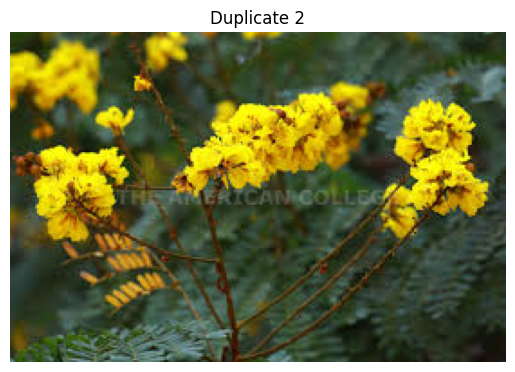

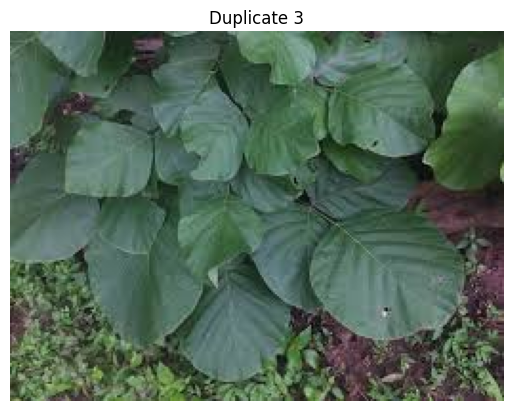

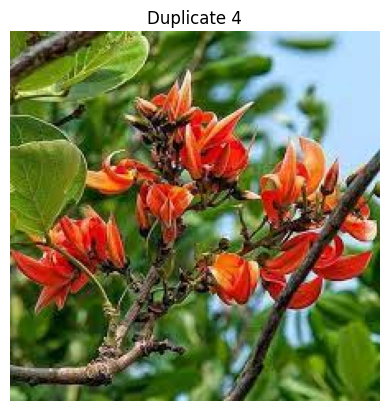

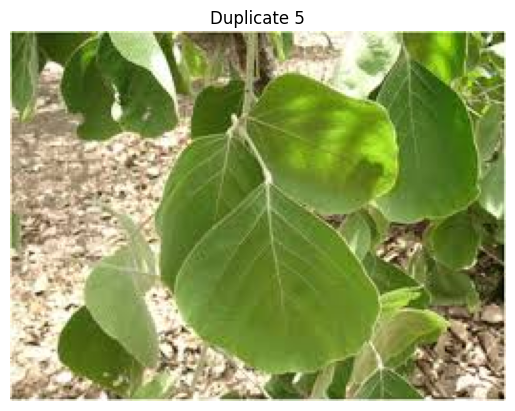

In [24]:
import hashlib
from PIL import Image
import matplotlib.pyplot as plt
import os

hash_dict = {}
duplicates = []

for subdir, _, files in os.walk(dataset_path):
    for file in files:
        if file.lower().endswith(('.jpg', '.jpeg', '.png')):
            filepath = os.path.join(subdir, file)
            try:
                with Image.open(filepath) as img:
                    h = hashlib.md5(img.tobytes()).hexdigest()
                    if h in hash_dict:
                        duplicates.append(filepath)
                    else:
                        hash_dict[h] = filepath
            except:
                print("❌ Cannot open", filepath)

print(f"⚠️ Total duplicate images found: {len(duplicates)}")

# Show 5 duplicates
for i in range(min(5, len(duplicates))):
    img = Image.open(duplicates[i])
    plt.imshow(img)
    plt.title(f"Duplicate {i+1}")
    plt.axis('off')
    plt.show()


Step 7: Delete Duplicate Images

In [25]:
import os

for dup in duplicates:
    try:
        os.remove(dup)
        print(f"🗑️ Removed: {dup}")
    except:
        print(f"❌ Could not delete: {dup}")


🗑️ Removed: /content/tree_species_dataset/Tree_Species_Dataset/coconut/download (1).jpg
🗑️ Removed: /content/tree_species_dataset/Tree_Species_Dataset/sonmahor/download (6).jpeg
🗑️ Removed: /content/tree_species_dataset/Tree_Species_Dataset/kesudo/images (33).jpeg
🗑️ Removed: /content/tree_species_dataset/Tree_Species_Dataset/kesudo/images (6).jpeg
🗑️ Removed: /content/tree_species_dataset/Tree_Species_Dataset/kesudo/download.jpeg
🗑️ Removed: /content/tree_species_dataset/Tree_Species_Dataset/kesudo/images (12).jpeg
🗑️ Removed: /content/tree_species_dataset/Tree_Species_Dataset/kesudo/images (41).jpeg
🗑️ Removed: /content/tree_species_dataset/Tree_Species_Dataset/kesudo/images (20).jpeg
🗑️ Removed: /content/tree_species_dataset/Tree_Species_Dataset/kesudo/images.jpeg
🗑️ Removed: /content/tree_species_dataset/Tree_Species_Dataset/kesudo/images (11).jpeg
🗑️ Removed: /content/tree_species_dataset/Tree_Species_Dataset/kesudo/images (29).jpeg
🗑️ Removed: /content/tree_species_dataset/Tree_S

Step 8: Detect and Show Outlier Images by Size

In [26]:
import numpy as np

sizes = []
small_imgs = []
large_imgs = []

for subdir, _, files in os.walk(dataset_path):
    for file in files:
        if file.lower().endswith(('.jpg', '.jpeg', '.png')):
            filepath = os.path.join(subdir, file)
            try:
                with Image.open(filepath) as img:
                    w, h = img.size
                    sizes.append((w, h))
                    if w*h < 10000:  # Very small (e.g. < 100x100)
                        small_imgs.append(filepath)
                    elif w*h > 300000:  # Very large (e.g. > 600x500)
                        large_imgs.append(filepath)
            except:
                pass

print(f"🔍 Very Small Images: {len(small_imgs)}")
print(f"🔍 Very Large Images: {len(large_imgs)}")

# Show 3 small images
for i in range(min(3, len(small_imgs))):
    img = Image.open(small_imgs[i])
    plt.imshow(img)
    plt.title(f"Small Outlier {i+1}")
    plt.axis('off')
    plt.show()


🔍 Very Small Images: 0
🔍 Very Large Images: 88


Step 9: Remove Outlier Images

In [27]:
outliers = small_imgs + large_imgs

for img_path in outliers:
    try:
        os.remove(img_path)
        print(f"🗑️ Removed Outlier: {img_path}")
    except:
        print(f"❌ Could not delete: {img_path}")


🗑️ Removed Outlier: /content/tree_species_dataset/Tree_Species_Dataset/coconut/640px-Singapore_coconut.jpg
🗑️ Removed Outlier: /content/tree_species_dataset/Tree_Species_Dataset/gulmohor/KPPCONT_036133_fullsize.jpg
🗑️ Removed Outlier: /content/tree_species_dataset/Tree_Species_Dataset/babul/large.jpg
🗑️ Removed Outlier: /content/tree_species_dataset/Tree_Species_Dataset/babul/5.jpg
🗑️ Removed Outlier: /content/tree_species_dataset/Tree_Species_Dataset/babul/4.jpg
🗑️ Removed Outlier: /content/tree_species_dataset/Tree_Species_Dataset/babul/3.jpeg
🗑️ Removed Outlier: /content/tree_species_dataset/Tree_Species_Dataset/babul/2.jpg
🗑️ Removed Outlier: /content/tree_species_dataset/Tree_Species_Dataset/babul/1.jpg
🗑️ Removed Outlier: /content/tree_species_dataset/Tree_Species_Dataset/babul/7.jpeg
🗑️ Removed Outlier: /content/tree_species_dataset/Tree_Species_Dataset/mango/13.jpg
🗑️ Removed Outlier: /content/tree_species_dataset/Tree_Species_Dataset/mango/image47.jpg
🗑️ Removed Outlier: /cont

Step 10: Analyze Image Dimensions (Width & Height Stats)

In [28]:
widths, heights = zip(*sizes)
print("📏 Average Width:", np.mean(widths))
print("📏 Average Height:", np.mean(heights))
print("🔺 Max Size:", np.max(widths), "x", np.max(heights))
print("🔻 Min Size:", np.min(widths), "x", np.min(heights))


📏 Average Width: 315.91941875825626
📏 Average Height: 272.6763540290621
🔺 Max Size: 4000 x 4032
🔻 Min Size: 141 x 128


In [29]:
import os
from collections import Counter

dataset_dir = '/content/tree_species_dataset/Tree_Species_Dataset'
class_counts = {}

for class_name in os.listdir(dataset_dir):
    class_path = os.path.join(dataset_dir, class_name)
    if os.path.isdir(class_path):
        class_counts[class_name] = len(os.listdir(class_path))

print("Class Distribution:")
for cls, count in class_counts.items():
    print(f"{cls}: {count}")


Class Distribution:
coconut: 48
sonmahor: 49
bamboo: 50
kesudo: 40
sitafal: 46
simlo: 36
saptaparni: 49
neem: 50
.git: 5
gulmohor: 42
vad: 49
babul: 43
mango: 35
motichanoti: 46
khajur: 49
other: 108
champa: 46
kanchan: 47
nilgiri: 44
gunda: 49
sugarcane: 50
jamun: 47
pilikaren: 46
cactus: 50
amla: 39
shirish: 48
pipal: 45
banyan: 50
bili: 43
asopalav: 44
garmalo: 38


In [30]:
!rm -rf /content/tree_species_dataset/Tree_Species_Dataset/.git


In [31]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)


In [32]:
train_path = '/content/tree_species_dataset/Tree_Species_Dataset'

from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    train_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    train_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 1153 images belonging to 30 classes.
Found 273 images belonging to 30 classes.


Step 11: Train CNN Model & Plot Accuracy Graph

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Set the correct training path
train_path = '/content/tree_species_dataset/Tree_Species_Dataset'

# ✅ ImageDataGenerator with image size 224x224
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),  # ✅ Match this with model input shape
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

# ✅ CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(30, activation='softmax')  # For 30 classes
])

# ✅ Compile the model
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# ✅ Train the model and store history
history = model.fit(train_generator, validation_data=val_generator, epochs=25)

# ✅ Save the model
model.save("improved_cnn_model.h5")


Found 1153 images belonging to 30 classes.
Found 273 images belonging to 30 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


37/37 ━━━━━━━━━━━━━━━━━━━━ 253s 7s/step - accuracy: 0.0735 - loss: 5.3502 - val_accuracy: 0.0183 - val_loss: 6.7457
Epoch 2/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 239s 6s/step - accuracy: 0.1909 - loss: 2.8480 - val_accuracy: 0.0256 - val_loss: 12.1433
Epoch 3/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 270s 7s/step - accuracy: 0.2528 - loss: 2.5836 - val_accuracy: 0.0256 - val_loss: 18.5848
Epoch 4/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 246s 7s/step - accuracy: 0.2880 - loss: 2.3865 - val_accuracy: 0.0256 - val_loss: 19.2300
Epoch 5/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 244s 7s/step - accuracy: 0.3728 - loss: 2.0982 - val_accuracy: 0.0256 - val_loss: 18.9836
Epoch 6/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 249s 7s/step - accuracy: 0.4495 - loss: 1.8650 - val_accuracy: 0.0256 - val_loss: 17.1973
Epoch 7/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 237s 6s/step - accuracy: 0.4962 - loss: 1.6529 - val_accuracy: 0.0476 - val_loss: 12.5441
Epoch 8/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 248s 7s/step - accuracy: 0.5746 - loss: 1.3838 - val_accuracy: 0.1172 - val_lo

In [57]:
print(train_generator.class_indices)


{'amla': 0, 'asopalav': 1, 'babul': 2, 'bamboo': 3, 'banyan': 4, 'bili': 5, 'cactus': 6, 'champa': 7, 'coconut': 8, 'garmalo': 9, 'gulmohor': 10, 'gunda': 11, 'jamun': 12, 'kanchan': 13, 'kesudo': 14, 'khajur': 15, 'mango': 16, 'motichanoti': 17, 'neem': 18, 'nilgiri': 19, 'other': 20, 'pilikaren': 21, 'pipal': 22, 'saptaparni': 23, 'shirish': 24, 'simlo': 25, 'sitafal': 26, 'sonmahor': 27, 'sugarcane': 28, 'vad': 29}


Step 12: Print Final Accuracy in Percentage

In [34]:
train_acc = history.history['accuracy'][-1] * 100
val_acc = history.history['val_accuracy'][-1] * 100

print(f"✅ Final Training Accuracy: {train_acc:.2f}%")
print(f"✅ Final Validation Accuracy: {val_acc:.2f}%")


✅ Final Training Accuracy: 90.03%
✅ Final Validation Accuracy: 30.04%


Step 13 : 📈 Plot Accuracy and Loss

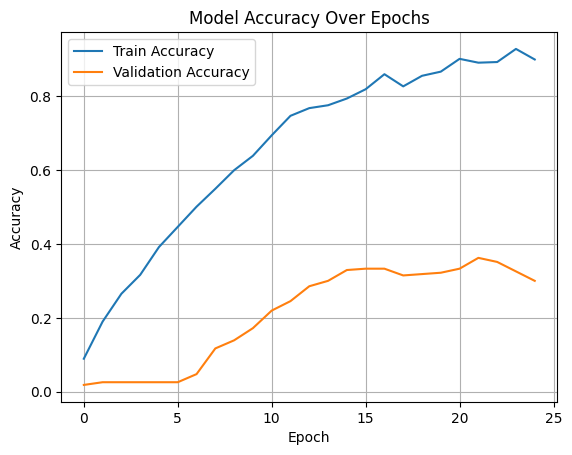

In [35]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Model Accuracy Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


Step 14: Save Model as .h5 File in Colab

In [ ]:
# Save model
model.save('best_tree_species_model_95acc.h5')

# Save class labels to JSON
import json
with open('labels.json', 'w') as f:
    json.dump(train_generator.class_indices, f)



In [ ]:
import os

dataset_dir = '/content/tree_species_dataset/Tree_Species_Dataset'
class_counts = {}

for folder in os.listdir(dataset_dir):
    path = os.path.join(dataset_dir, folder)
    if os.path.isdir(path):
        count = len([file for file in os.listdir(path) if file.endswith(('.png', '.jpg', '.jpeg'))])
        class_counts[folder] = count

print("📊 Class Image Counts:")
for species, count in class_counts.items():
    print(f"{species}: {count}")


In [38]:
from google.colab import files
files.download('best_tree_species_model_95acc.h5')
files.download('labels.json')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Step 15 : Save it to Google Drive

In [39]:
!cp /content/tree_species_model.h5 /content/drive/MyDrive/
print("📁 Copied to Google Drive: MyDrive/tree_species_model.h5")


📁 Copied to Google Drive: MyDrive/tree_species_model.h5


Step 16 : To Verify It’s Saved

In [40]:
!ls -lh /content/tree_species_model.h5


-rw-r--r-- 1 root root 56M Aug  2 06:01 /content/tree_species_model.h5


Step 17 : To download h5 model

In [41]:
!zip -r /content/tree_species_dataset.zip /content/tree_species_dataset



  adding: content/tree_species_dataset/ (stored 0%)
  adding: content/tree_species_dataset/Tree_Species_Dataset/ (stored 0%)
  adding: content/tree_species_dataset/Tree_Species_Dataset/coconut/ (stored 0%)
  adding: content/tree_species_dataset/Tree_Species_Dataset/coconut/images (12).jpg (deflated 0%)
  adding: content/tree_species_dataset/Tree_Species_Dataset/coconut/images (6).jpg (deflated 0%)
  adding: content/tree_species_dataset/Tree_Species_Dataset/coconut/images (7).jpg (deflated 0%)
  adding: content/tree_species_dataset/Tree_Species_Dataset/coconut/images.jpg (deflated 0%)
  adding: content/tree_species_dataset/Tree_Species_Dataset/coconut/images (34).jpg (deflated 0%)
  adding: content/tree_species_dataset/Tree_Species_Dataset/coconut/images (4).jpg (deflated 0%)
  adding: content/tree_species_dataset/Tree_Species_Dataset/coconut/images (3).jpg (deflated 0%)
  adding: content/tree_species_dataset/Tree_Species_Dataset/coconut/images (28).jpg (deflated 0%)
  adding: content/t

In [42]:
from google.colab import files
uploaded = files.upload()


Saving tree_species_model.h5 to tree_species_model (1).h5


In [ ]:
import os
print(os.listdir())  # to confirm filename


In [ ]:
from tensorflow.keras.models import load_model

# Just load by filename (Colab is already in the right folder)
model = load_model('tree_species_model.h5')


Step 18: Install Gradio

In [ ]:
!pip install gradio


Step 19: Load Libraries and Model

Step 20: Define Prediction Function

Step 21: Build Gradio Front-End

In [58]:
import gradio as gr
from tensorflow.keras.models import load_model
import numpy as np
from PIL import Image

# ✅ Load the trained model
model = load_model("improved_cnn_model.h5")

# ✅ Correct class names based on train_generator.class_indices
class_names = [
    'amla', 'asopalav', 'babul', 'bamboo', 'banyan', 'bili', 'cactus', 'champa', 'coconut', 'garmalo',
    'gulmohor', 'gunda', 'jamun', 'kanchan', 'kesudo', 'khajur', 'mango', 'motichanoti', 'neem', 'nilgiri',
    'other', 'pilikaren', 'pipal', 'saptaparni', 'shirish', 'simlo', 'sitafal', 'sonmahor', 'sugarcane', 'vad'
]

# ✅ Optional: Full plant information (you can expand this)
plant_info = {
    'amla': {'scientific_name': 'Phyllanthus emblica', 'uses': 'Rich in Vitamin C, medicinal', 'region': 'India'},
    'asopalav': {'scientific_name': 'Polyalthia longifolia', 'uses': 'Ornamental, medicinal', 'region': 'India'},
    'babul': {'scientific_name': 'Vachellia nilotica', 'uses': 'Toothbrush sticks, gum, medicinal', 'region': 'Africa, India'},
    'bamboo': {'scientific_name': 'Bambusoideae spp.', 'uses': 'Construction, crafts, food', 'region': 'Asia, Latin America'},
    'banyan': {'scientific_name': 'Ficus benghalensis', 'uses': 'Shade, religious, ecological', 'region': 'India'},
    'bili': {'scientific_name': 'Aegle marmelos', 'uses': 'Medicinal, religious', 'region': 'India'},
    'cactus': {'scientific_name': 'Cactaceae spp.', 'uses': 'Ornamental, drought-resistant', 'region': 'Americas'},
    'champa': {'scientific_name': 'Magnolia champaca', 'uses': 'Perfume, ornamental', 'region': 'India'},
    'coconut': {'scientific_name': 'Cocos nucifera', 'uses': 'Food, oil, coir', 'region': 'Tropical regions'},
    'garmalo': {'scientific_name': 'Cassia fistula', 'uses': 'Ornamental, medicinal', 'region': 'India'},
    'gulmohor': {'scientific_name': 'Delonix regia', 'uses': 'Shade, ornamental', 'region': 'Tropical areas'},
    'gunda': {'scientific_name': 'Cordia dichotoma', 'uses': 'Edible fruit, medicinal', 'region': 'India'},
    'jamun': {'scientific_name': 'Syzygium cumini', 'uses': 'Fruit, diabetes management', 'region': 'India'},
    'kanchan': {'scientific_name': 'Bauhinia variegata', 'uses': 'Ornamental, medicinal', 'region': 'India'},
    'kesudo': {'scientific_name': 'Butea monosperma', 'uses': 'Dye, medicinal', 'region': 'India'},
    'khajur': {'scientific_name': 'Phoenix dactylifera', 'uses': 'Dates, ornamental', 'region': 'Middle East, India'},
    'mango': {'scientific_name': 'Mangifera indica', 'uses': 'Fruit, wood', 'region': 'India'},
    'motichanoti': {'scientific_name': 'Clerodendrum phlomidis', 'uses': 'Medicinal', 'region': 'India'},
    'neem': {'scientific_name': 'Azadirachta indica', 'uses': 'Medicinal, pesticide', 'region': 'India'},
    'nilgiri': {'scientific_name': 'Eucalyptus globulus', 'uses': 'Oil, wood, respiratory', 'region': 'India, Australia'},
    'other': {'scientific_name': 'Unknown', 'uses': 'Uncategorized', 'region': 'Various'},
    'pilikaren': {'scientific_name': 'Unknown', 'uses': 'Uncategorized', 'region': 'India'},
    'pipal': {'scientific_name': 'Ficus religiosa', 'uses': 'Religious, air purification', 'region': 'India'},
    'saptaparni': {'scientific_name': 'Alstonia scholaris', 'uses': 'Medicinal, ornamental', 'region': 'India'},
    'shirish': {'scientific_name': 'Albizia lebbeck', 'uses': 'Shade, nitrogen fixing', 'region': 'India'},
    'simlo': {'scientific_name': 'Bombax ceiba', 'uses': 'Silk cotton, timber', 'region': 'India'},
    'sitafal': {'scientific_name': 'Annona squamosa', 'uses': 'Fruit, medicinal', 'region': 'India'},
    'sonmahor': {'scientific_name': 'Senna auriculata', 'uses': 'Medicinal, flowers', 'region': 'India'},
    'sugarcane': {'scientific_name': 'Saccharum officinarum', 'uses': 'Sugar production', 'region': 'India'},
    'vad': {'scientific_name': 'Ficus benghalensis', 'uses': 'Sacred tree, shade', 'region': 'India'}
}

# ✅ Prediction function
def predict_tree_species(img):
    try:
        img = img.resize((224, 224))
        img = np.array(img) / 255.0
        img = img.reshape(1, 224, 224, 3)

        prediction = model.predict(img)
        class_index = np.argmax(prediction)
        confidence = np.max(prediction) * 100
        predicted_class = class_names[class_index]

        result = f"🌳 **Predicted Tree Species**: {predicted_class.title()}\n"
        result += f"✅ **Confidence**: {confidence:.2f}%\n\n"

        info = plant_info.get(predicted_class, {})
        if info:
            result += f"🧬 **Scientific Name**: {info.get('scientific_name')}\n"
            result += f"💊 **Uses**: {info.get('uses')}\n"
            result += f"🗺️ **Region Found**: {info.get('region')}"
        else:
            result += "ℹ️ No detailed information available."

        return result
    except Exception as e:
        return f"❌ Error: {str(e)}"

# ✅ Launch the Gradio interface
interface = gr.Interface(
    fn=predict_tree_species,
    inputs=gr.Image(type="pil"),
    outputs="text",
    title="🌿 Tree Species Classifier",
    description="Upload a tree leaf image to identify its species from 30 classes."
)

interface.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://343cf256412bddaf15.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
import os

root = '/content/tree_species_dataset'
for folder in os.listdir(root):
    print(f"{folder} → {len(os.listdir(os.path.join(root, folder)))} images")


In [ ]:
import os
import shutil

source = '/content/tree_species_dataset'  # your original dataset folder
cleaned = '/content/clean_tree_dataset'   # new cleaned dataset

os.makedirs(cleaned, exist_ok=True)

for folder in os.listdir(source):
    if folder.startswith('.') or folder == '__MACOSX':
        continue
    full_path = os.path.join(source, folder)
    if os.path.isdir(full_path):
        shutil.copytree(full_path, os.path.join(cleaned, folder))

print("✅ Clean dataset ready at:", cleaned)


In [49]:
print("✅ Classes Detected:", train_generator.class_indices)
print("Total Classes:", len(train_generator.class_indices))


✅ Classes Detected: {'amla': 0, 'asopalav': 1, 'babul': 2, 'bamboo': 3, 'banyan': 4, 'bili': 5, 'cactus': 6, 'champa': 7, 'coconut': 8, 'garmalo': 9, 'gulmohor': 10, 'gunda': 11, 'jamun': 12, 'kanchan': 13, 'kesudo': 14, 'khajur': 15, 'mango': 16, 'motichanoti': 17, 'neem': 18, 'nilgiri': 19, 'other': 20, 'pilikaren': 21, 'pipal': 22, 'saptaparni': 23, 'shirish': 24, 'simlo': 25, 'sitafal': 26, 'sonmahor': 27, 'sugarcane': 28, 'vad': 29}
Total Classes: 30


In [50]:
import os
from collections import Counter

folder = '/content/tree_species_dataset/Tree_Species_Dataset'
count = {}

for class_folder in os.listdir(folder):
    class_path = os.path.join(folder, class_folder)
    if os.path.isdir(class_path):
        count[class_folder] = len(os.listdir(class_path))

print("📊 Image Counts Per Class:")
for k, v in count.items():
    print(f"{k}: {v}")


📊 Image Counts Per Class:
coconut: 48
sonmahor: 49
bamboo: 50
kesudo: 40
sitafal: 46
simlo: 36
saptaparni: 49
neem: 50
gulmohor: 42
vad: 49
babul: 43
mango: 35
motichanoti: 46
khajur: 49
other: 108
champa: 46
kanchan: 47
nilgiri: 44
gunda: 49
sugarcane: 50
jamun: 47
pilikaren: 46
cactus: 50
amla: 39
shirish: 48
pipal: 45
banyan: 50
bili: 43
asopalav: 44
garmalo: 38


In [51]:
import os

path = '/content/tree_species_dataset/Tree_Species_Dataset'
print(os.listdir(path))


['coconut', 'sonmahor', 'bamboo', 'kesudo', 'sitafal', 'simlo', 'saptaparni', 'neem', 'gulmohor', 'vad', 'babul', 'mango', 'motichanoti', 'khajur', 'other', 'champa', 'kanchan', 'nilgiri', 'gunda', 'sugarcane', 'jamun', 'pilikaren', 'cactus', 'amla', 'shirish', 'pipal', 'banyan', 'bili', 'asopalav', 'garmalo']


In [52]:
from sklearn.utils import class_weight
import numpy as np

# Get class indices
class_labels = train_generator.classes
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(class_labels),
    y=class_labels
)

class_weights = dict(enumerate(class_weights))


In [ ]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=25,
    class_weight=class_weights  # ✅ handle imbalance
)
